# Challenge:
How likely a user will buy which item in which week?

# What do we have?
- files for order items and category hierarchy
- submission file with shape roughly: user, item, week of replenishment

# What information do we need to solve our challenge?
- What is a user buying? - item 29657 is the most bought one
- When is he usually ordering? - on the weekends or thursday (from presentations on Tuesday)
- What is he re-ordering? ->changed to how often (see results below)
- How much times pass on average?



In [1]:
# cell to import all the needed basic packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
# load the csv files into data frames for further use

order = pd.read_csv("data/orders.csv", delimiter="|")
item = pd.read_csv("data/items.csv", delimiter="|")


In [3]:
# find out which items get order most - sum is need because order = amount ordered
item_sum = order.groupby("itemID").sum()
item_sum = item_sum.drop(['userID'], axis=1)
#max sum 29116
print(item_sum[item_sum['order']==29116])

        order
itemID       
29657   29116


In [4]:
item_sum.describe()

,order
count,31756.000000
mean,47.231830
std,257.843267
min,1.000000
25%,2.000000
50%,7.000000
75%,27.000000
max,29116.000000


In [5]:
# found out that item 29657 is the most order item. lets look at its history
item_max_ordered = order[order['itemID']==29657]

print(item_max_ordered.head())

           date  userID  itemID  order
195  2020-06-01   16922   29657      1
378  2020-06-01   13972   29657      1
480  2020-06-01   40356   29657      3
603  2020-06-01    7294   29657      2
615  2020-06-01   39744   29657      5


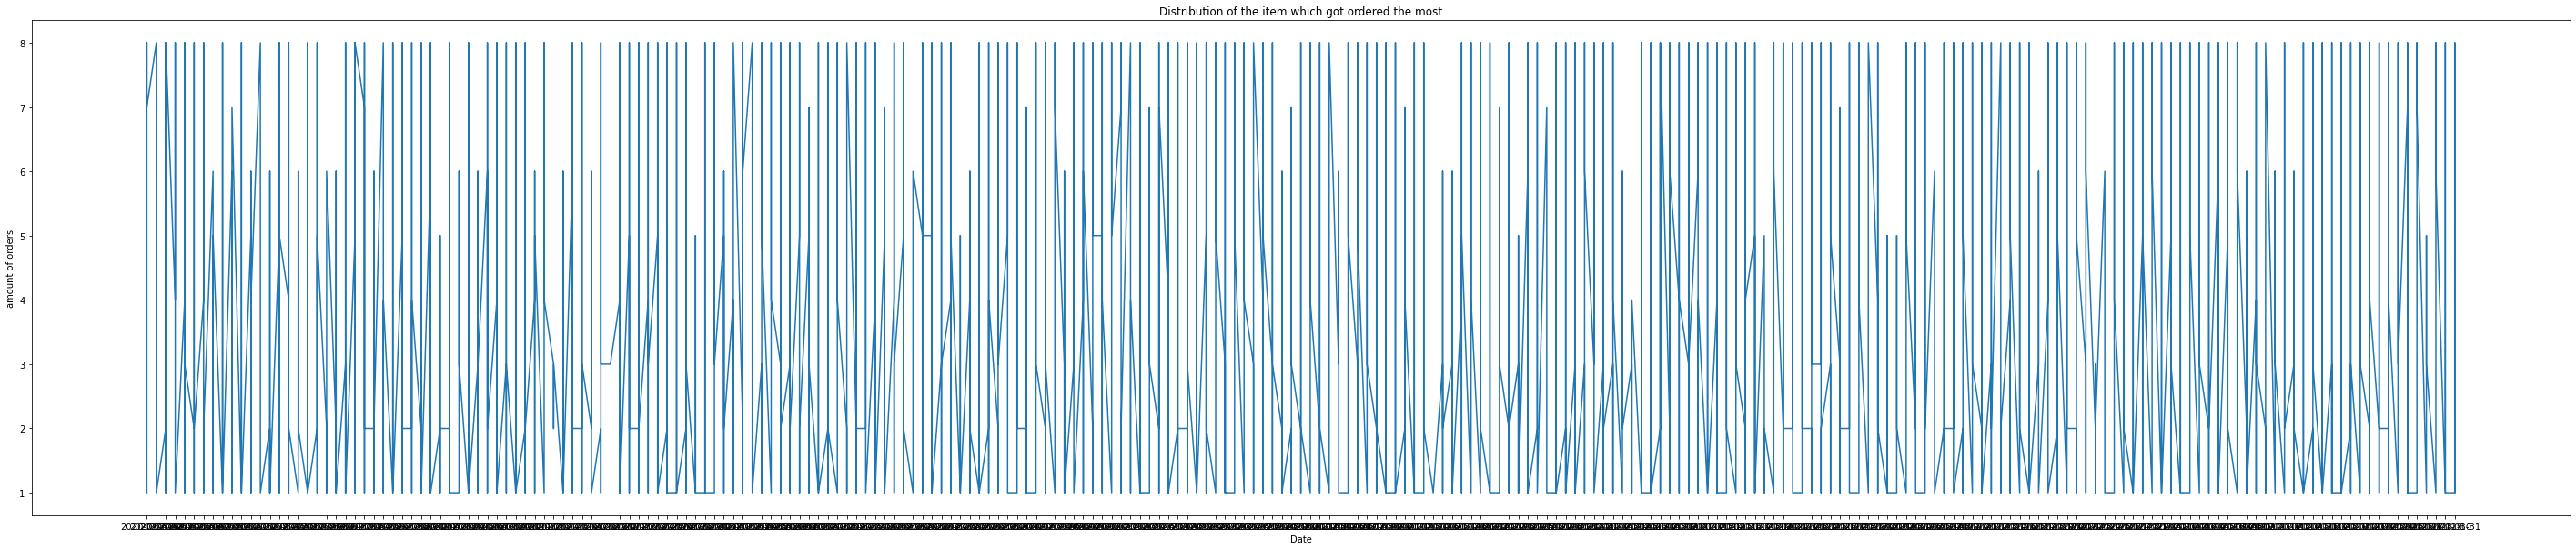

In [6]:
#look at distribution of 
plt.figure(figsize=(50,10))
plt.plot(item_max_ordered['date'], item_max_ordered['order'])
plt.xlabel("Date")
plt.ylabel("amount of orders")
plt.title("Distribution of the item which got ordered the most")
plt.show()

In [8]:
#looks like that the amount of the item was max 8 - what is mean and median?
print("Mean: %s"%item_max_ordered['order'].mean())
print("Median: %s"%item_max_ordered['order'].median())
print("Max: %s"%item_max_ordered['order'].max())
print("Standard Deviation: %s"%item_max_ordered['order'].std())

Mean: 2.787286999808539
Median: 2.0
Max: 8
Standard Deviation: 1.861127679320713


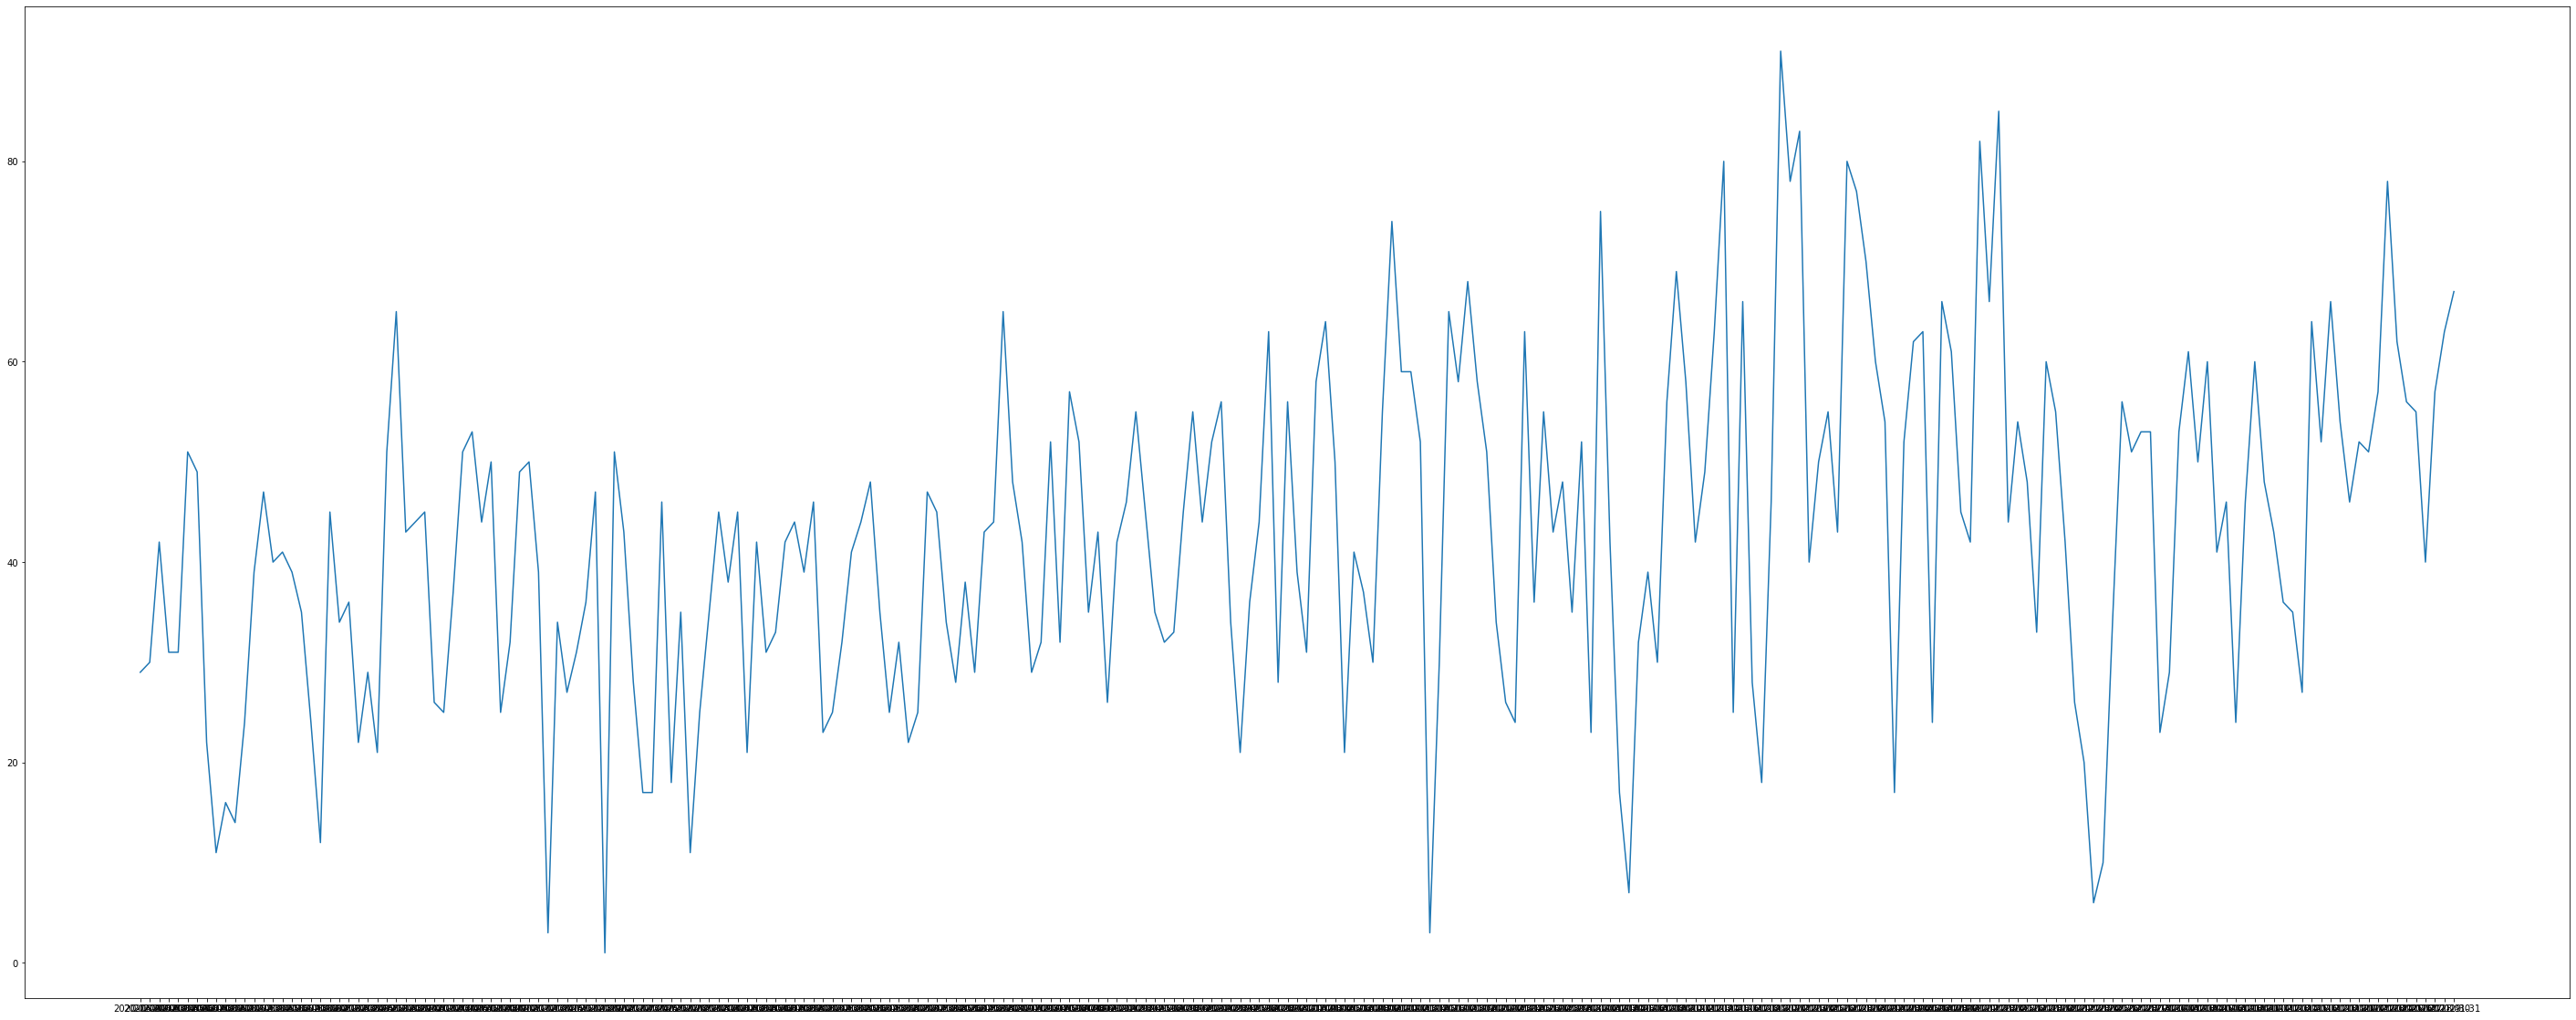

Mean: 42.63673469387755
Median: 43.0
Max: 91
standard deviation: 16.610863197899263


In [9]:
# how often does it get ordered a day?
date_freq = item_max_ordered.groupby("date").count()
# plot the result
plt.figure(figsize=(50,20))
plt.plot(date_freq.index, date_freq['order'])
plt.show()

#look at mean median and max again
print("Mean: %s"%date_freq['order'].mean())
print("Median: %s"%date_freq['order'].median())
print("Max: %s"%date_freq['order'].max())
print("standard deviation: %s"%date_freq['order'].std())

In [10]:
# are people who only buy once outliers?
user_order = order.groupby("userID").count()
user_order = user_order.drop(["date","itemID"], axis=1)
#print(user_order)

#look at user with 1 order only first
user_1_order = user_order[user_order['order']==1]
display(user_1_order)

,order
userID,
30,1
307,1
1033,1
1271,1
1491,1
...,...
44122,1
44992,1
45320,1


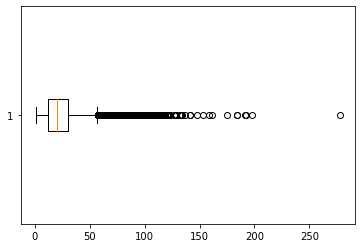

In [11]:
#make a boxplot to see if the people only order once are outliers
plt.boxplot(user_order,vert=False, meanline=True)
plt.show()

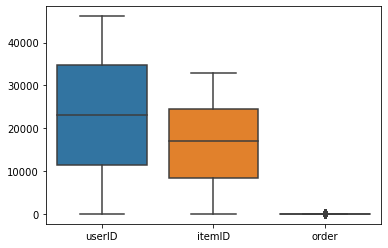

In [13]:
#lets do a boxplot for the order file
sb.boxplot(data=order)
plt.show()

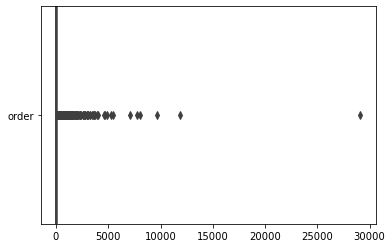

In [16]:
#lets look more into orders
sb.boxplot(data=item_sum, orient="h", width=5000)
plt.show()

In [17]:
#check out the statistics of items and the amount they get orderd to understand the outliers

print("Mean: %s"%item_sum['order'].mean())
print("Median: %s"%item_sum['order'].median())
print("Max: %s"%item_sum['order'].max())
print("Standard Deviation: %s"%item_sum['order'].std())

Mean: 47.23183020531553
Median: 7.0
Max: 29116
Standard Deviation: 257.84326701876523


# Results over the whole time spend of order.csv

- items which get ordered up to the amount of 305 are not outliers
- user, who orders up to 50 times are not considered outliers
- looking at the most ordered item it mostly gets ordered 2 times at once and max. amount of orders was 8 

# Looking now on the time differences of the orders

I created some use full function to get to a calendar week representation of the data based on a data frame, which needs a 'date' column. Also a transformation to a only calendar week df can be made.

TODO: rewrite section once the coding is done

In [19]:
#transforming date into hot encoding based on week
#first step create a df which should look like the final one
"""
Basic idea is to have first a one-hot encoding of the weeks when the purchase has been conducted. 
"""
eval_df_hot = pd.DataFrame(columns=['year-month','week 1','week 2','week 3','week 4','week 5(?)','userID', 'itemID', 'order'])
eval_df_tdif =pd.DataFrame(columns=['week#','userID', 'itemID', 'order'])
eval_df_tdif.set_index('week#')

print(eval_df_hot)
print(eval_df_tdif)

Empty DataFrame
Columns: [year-month, week 1, week 2, week 3, week 4, week 5(?), userID, itemID, order]
Index: []
Empty DataFrame
Columns: [week#, userID, itemID, order]
Index: []


In [41]:
"""
In order to achieve result to calculate the time diff we need to transform the dates from daily view into a weekly view.
We know that for our data set a week consists of 7 days. So we need to "bin" the days into weeks.
"""

def dates_to_noWeeks(df):
    # check dataframe for column name that contains 'date' or column with dtypes datetime64[ns]
    cols = df.columns.to_list()
    print(cols)
    for i in cols:
        if i=='date':
            df['date'] = pd.to_datetime(df['date'])
    df['noWeeks'] = df['date'].dt.isocalendar().week
    
    return df 
    


In [43]:
#transform a df into the eval_df_tdif df columns: ['noWeeks', 'userID','itemID', 'order']
def get_noWeeks_df(df):
    cols = df.columns.to_list()
    for i in cols:
        if i=='date':
            df = df.drop(['date'], axis=1)
        if i =='noWeeks':
            df = df[ ['noWeeks'] + [ col for col in df.columns if col != 'noWeeks' ] ]
    
    return df 
    

In [45]:
#ToDo: Function to calculate time_spent to the next buy of a user based on returned df of get_oWeeks_df

In [ ]:
#ToDo: Hotencoding for weeks in a month